<a href="https://colab.research.google.com/github/MehzHats/Boston-Data-Analysis/blob/main/Boston_Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Airbnb Data Analysis

The dataset used in this notebook was choosen from the Boston Airbnb Open Data hosted on Kaggle. This dataset contains bookings, listings and reviews of homestay activity from 2008 till 2016.

This dataset is analysed based on the  the Cross-Industry Standard Process for Data Mining (CRISP-DM) incorporated as a part of the "Write a Data Science Blog Post" project for Udacity's Data Scientist Nanodegree. 

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

1. **Business understanding** – What are the needs of the business?
2. **Data understanding** – What data do we have / need? Is it clean?
3. **Data preparation** – How the data is organised for modeling?
4. **Modeling** – What are the modeling techniques applied?
5. **Evaluation** – Which model best meets the objectives of business?
6. **Deployment** – How do stakeholders access the results?




## About Data

The following Airbnb activity is included in this Boston dataset:

1.   Listings, including full descriptions and average review score.
2.   Reviews, including unique id for each reviewer and detailed comments
3. Calendar, including listing id and the price and availability for that day

## Get Data

In [1]:
!pip install --user -q kaggle

In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
# Add your kaggle key and username below.
!cd ~/.kaggle/ && echo '{"username":"","key":""}' > "./kaggle.json"
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download airbnb/boston
!unzip boston.zip
!rm boston.zip

 31% 5.00M/16.1M [00:00<00:00, 37.7MB/s]
100% 16.1M/16.1M [00:00<00:00, 86.8MB/s]
Archive:  boston.zip
  inflating: calendar.csv            
  inflating: listings.csv            
  inflating: reviews.csv             


## Imports

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Settings

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.9f' % x)

## Section 1: Business Understanding
The listing of AirBnB's rental homes in and near the neighbourhood of Boston, Massachusetts, as well as the guest evaluations and the dates that the homes were available, were made public. We'll examine this information in this blog to learn more about the cities and the areas , the impacts of the various columns on the data sets , how the positive and negative reviews affect the listings by the host, the number of other factors that contribute to the choice of the guests and price factor based on the time of the booking.

We will make an effort to comprehend the types of homes that are offered, their costs, the distribution of these listings, the number of reviews, and, finally, how visitors described the properties after their stay.


 **We aspire to answer following questions from the dataset.**
1. Which column has the most impact on the data?
2. Which cities are the most expensive?
3. How reviews affect listings?
4. What factors affect the listings booked by customers?
5. Price difference between the peak period and off season?

## Section 2: Data Understanding

AirBnB has made the listing of its rental properties in and around Boston, MA neighborhoods public, along with the reviews left by guests, and the dates when properties were available. In this blog, we will review this data to learn about the neighborhood and attempt to understand which types of properties are available, their prices, the concentration of these listings, the number of reviews and lastly, how guests described the properties after their stay.

### Utility Function For Exploration

In [7]:
def explore_column(df, column, print_samples=None, print_unique=False):
  """
  Prints information about a column from the given dataset.
  Parameters
  ----------
  df: pandas dataframe, required
    default is None
  column: string, required
    default is None
  print_samples: slice, optional
    default is None
  print_unique: bool, optional
    default is False
  """ 

  print("There are {} of na columns.".format(df[column].isna().sum()))
  print("There are {} unique values".format(df[column].nunique()))
  print("Column type: ", df[column].dtype)

  if print_unique:
    print("Unique values: ", df[column].unique())

  if not print_samples == None:
    print("Sample Values: ", df[column].iloc[print_samples])

### Exploration of dataset

In [8]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')


#### Calendar Data

In [ ]:
#print the head of calendar
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [ ]:
#calendar data types
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [ ]:
explore_column(calendar, "price")

There are 665853 of na columns.
There are 1246 unique values
Column type:  object


In [ ]:
calendar[(calendar["price"].isna()) & (calendar["available"] == "t")]

,listing_id,date,available,price


In [ ]:
calendar[(calendar["price"].notna()) & (calendar["available"] == "f")]

,listing_id,date,available,price


In [ ]:
calendar[(calendar["price"].isna()) & (calendar["available"] == "f")]

In [ ]:
calendar[(calendar["price"].notna()) & (calendar["available"] == "t")]

In [ ]:
# calendar["price"] = calendar["price"].fillna("$0")
# calendar["price"] = calendar["price"].replace('[\$,]', '', regex = True).astype(float)

In [ ]:
#Calendar[calendar.columns[0]].count()
#len(calendar.index)
calendar.shape

In [ ]:
#print description of data
calendar.describe()

In [ ]:
#print concise summary of data
calendar.info()

In [ ]:
# Check if number of missing values is the same as number of 'f' availability
calendar.price.isna().sum() 

In [ ]:
calendar.duplicated().sum()

In [ ]:
# calendar[(calendar["listing_id"] == 12898806) & (calendar["date"] == "2017-06-15")]
calendar[calendar.duplicated()]

In [ ]:
# price_corr = calendar.corr()['price'].sort_values(ascending = False)[1:]
# price_corr
# print ('Correlation Matrix')
# print(calendar.corr())
# print()

**Calendar Data Issues Identified**

- listing_id: convert to `str`
- date: convert to `datetime`
- available: convert to dummy variable
- price: drop $ and comma and convert to float/int




#### Listings Data

In [ ]:
#print the head of listings
listings.head()

In [ ]:
# len_listings = len('listings')
# print(len_listings)
#listings[listings.columns[0]].count()
#len(listings.index)
listings.shape

In [ ]:
#print description of data
listings.describe()

In [ ]:
#print concise summary of data
listings.info()

In [ ]:
# Inspecting the difference between summary & description
print(listings["summary"][1])
print(listings["description"][1])

In [ ]:
# Inspecting space column
explore_column(listings, "space", print_samples=slice(10,14))

There are 1057 of na columns.
There are 2268 unique values
Sample Values:  10    NaN
11    NaN
12    NaN
13    NaN
Name: space, dtype: object


In [ ]:
# Inspecting experiences_offered column
explore_column(listings, "experiences_offered", print_unique=True, print_samples=slice(5))

There are 0 of na columns.
There are 1 unique values
Unique values:  ['none']
Sample Values:  0    none
1    none
2    none
3    none
4    none
Name: experiences_offered, dtype: object


In [ ]:
# Inspecting neighborhood_overview column
print(listings["neighborhood_overview"][124])
print(listings["neighborhood_overview"][130])

In [ ]:
# inspecting some of the URL columns
listings[["medium_url", "thumbnail_url"]].iloc[0]

In [ ]:
print(listings["host_id"][0])
listings["host_id"].nunique()

In [ ]:

listings[listings["host_response_time"].notna()]["host_response_time"]

In [ ]:
listings["experiences_offered"].unique()

In [ ]:
listings["host_name"][0], listings["host_since"][0], listings["host_location"][0], listings["host_about"][0]

In [ ]:
listings["host_response_rate"].unique()

In [ ]:
listings["host_acceptance_rate"].unique()

In [ ]:
listings[listings["host_is_superhost"].isna()]

In [ ]:
(print(listings["host_listings_count"].unique()))
listings["host_listings_count"].isna().sum()

In [ ]:
print(listings["host_total_listings_count"].unique())
listings["host_total_listings_count"].isna().sum()

In [ ]:
listings[listings["host_listings_count"] != listings["host_total_listings_count"]]

In [ ]:
print(listings["host_verifications"].isna().sum())
listings["host_verifications"].unique()

In [ ]:
listings["host_identity_verified"].value_counts()

In [ ]:
listings[listings["neighbourhood"].isna()][["neighbourhood", "neighbourhood_cleansed"]]

In [ ]:
listings["neighbourhood_group_cleansed"].unique()

NameError: ignored

In [ ]:
listings[listings["city"] != listings["neighbourhood_cleansed"]][["city", "neighbourhood_cleansed"]]

In [ ]:
listings["state"].unique()

In [ ]:
print(listings["zipcode"].isna().sum())
listings["zipcode"].unique()

In [ ]:
listings["market"].unique()

In [ ]:
listings["smart_location"].unique()

In [ ]:
print(listings["security_deposit"].isna().sum())
listings["security_deposit"].unique()

In [ ]:
print(listings["cleaning_fee"].isna().sum())
listings["cleaning_fee"].unique()

In [ ]:
print(listings["accommodates"].unique())
listings["accommodates"].isna().sum()

In [ ]:
print(listings["guests_included"].isna().sum())
listings["guests_included"].unique()

In [ ]:
listings[listings["accommodates"] != listings["guests_included"]][["accommodates", "guests_included"]]

In [ ]:
print(listings["extra_people"].isna().sum())
listings["extra_people"].unique()

In [ ]:
print(listings["calendar_updated"].isna().sum())
listings["calendar_updated"].unique()

In [ ]:
print(listings["has_availability"].isna().sum())
listings["has_availability"].unique()

In [ ]:
print(listings["availability_30"].isna().sum())
listings["availability_30"].unique()


In [ ]:
print(listings["availability_60"].isna().sum())
listings["availability_60"].unique()

In [ ]:
print(listings.iloc[0])

In [ ]:
print(listings["first_review"].isna().sum())
listings["first_review"].unique()

In [ ]:
# Check if all rows have unique IDs
listings.id.nunique()

In [ ]:
# Are there less host ids?
listings.host_id.nunique()

In [ ]:
# Check response times
listings.host_response_time.nunique()
print(listings.host_response_time.nunique())

In [ ]:
listings.host_neighbourhood.nunique()

In [ ]:
# Check values for city
listings.city.value_counts()

In [ ]:
listings["instant_bookable"].value_counts()

In [ ]:
print(listings["cancellation_policy"].unique())
print(listings["cancellation_policy"].value_counts())

In [ ]:
print(listings["calculated_host_listings_count"].unique())
print(listings["calculated_host_listings_count"].value_counts())

In [ ]:
listings["house_rules"].iloc[0]

In [ ]:
print(listings["property_type"].unique())
listings["property_type"].isna().sum()

In [ ]:
print(listings["room_type"].unique())
listings["room_type"].isna().sum()

In [ ]:
print(listings["accommodates"].unique())
listings["accommodates"].isna().sum()

In [ ]:
print(listings["bathrooms"].unique())
listings["bathrooms"].isna().sum()

In [ ]:
print(listings["bedrooms"].unique())
listings["bedrooms"].isna().sum()

In [ ]:
print(listings["beds"].unique())
listings["beds"].isna().sum()

In [ ]:
print(listings["bed_type"].unique())
listings["bed_type"].isna().sum()

In [ ]:
listings[listings["beds"] == 9].iloc[0]

In [ ]:
print(listings["amenities"].unique())
listings["amenities"].isna().sum()

In [ ]:
print(listings["square_feet"].unique())
print(listings["square_feet"].isna().sum())
listings["square_feet"][50]

In [ ]:
print(listings["price"].unique())
listings["price"].isna().sum()

In [ ]:
print(listings["weekly_price"].unique())
listings["weekly_price"].isna().sum()

In [ ]:
listings["monthly_price"].isna().sum()

In [ ]:
print(listings["extra_people"].unique())
listings["extra_people"].isna().sum()

In [ ]:
listings["extra_people"].value_counts()

In [ ]:
print(listings['city'].nunique())
listings['city'].unique()

In [ ]:
# this needs to be dropped as needed in the processing of listings data
"""
"listing_url", "scrape_id", "last_scraped", "summary", 
"experiences_offered", "thumbnail_url", "medium_url", 
"picture_url", "xl_picture_url", "host_url", 
"host_thumbnail_url", "host_picture_url", 
"host_total_listings_count", "host_verifications", 
"host_has_profile_pic", "host_identity_verified", 
"neighbourhood", "neighbourhood_group_cleansed", 
"state", "market", "country_code", "smart_location", 
"country", "latitude", "longitude", "is_location_exact", 
"security_deposit", "cleaning_fee", "minimum_nights", 
"maximum_nights", "calendar_updated", "has_availability", 
"availability_30", "availability_60", "availability_90", 
"availability_365", "calendar_last_scraped", "first_review", 
"last_review", "review_scores_rating", "review_scores_accuracy", 
"review_scores_cleanliness", "review_scores_checkin", 
"review_scores_communication", "review_scores_location", 
"review_scores_value", "requires_license", "license", 
"jurisdiction_names", "require_guest_profile_picture", 
"require_guest_phone_verification", "calculated_host_listings_count",
"number_of_reviews", "reviews_per_month", "guests_included", "host_name",
"host_since", "host_location", "host_response_rate", 
"host_acceptance_rate", "host_is_superhost", 
"host_neighbourhood", "host_id", "host_about"
"""

#### Reviews Data 

In [ ]:
#print the head of listings
reviews.head()

In [ ]:
#reviews[reviews.columns[0]].count()
#len(reviews.index)
reviews.shape

In [ ]:
#print description of data
reviews.describe()

In [ ]:
#print concise summary of data
reviews.info()

In [ ]:
reviews["comments"].isna().sum()

In [ ]:
reviews.reviewer_id.nunique()

In [ ]:
reviews.duplicated("reviewer_id").sum()

In [ ]:
reviews.duplicated(subset=["reviewer_id", "listing_id"]).sum()

In [ ]:
print(reviews.duplicated(subset=["reviewer_id", "listing_id", "date"]).sum())
reviews[reviews.duplicated(subset=["reviewer_id", "listing_id", "date"], keep=False)]

In [ ]:
print(reviews.duplicated(subset=["reviewer_id", "listing_id", "comments"]).sum())
reviews[reviews.duplicated(subset=["reviewer_id", "listing_id", "comments"], keep=False)]

**Review Data Issues Identified**

- reviewer_id: convert to `str`
- date: convert to `datetime`
- reviewer_id: convert to dummy
- comment: ? missing value and duplication 



## Section 3: Data Preparation
In order for the results to be reliable, data preparation makes sure that the raw data being prepared for analysis and processing is accurate and consistent. Data preparation efforts may involve resolving data issues, confirming data quality, and consolidating data collections.

Finding pertinent data is another step in the data preparation process that enables analytics programmes to provide useful information and practical insights. By combining internal and external data sets, developing new data fields, removing outlier values, and resolving imbalanced data sets that can skew analytics results, the data is frequently enriched and optimised to make it much more relevant and usable.

The data preparation pipeline consists of the following steps.

1. Access the data.
2. Fetch the data.
3. Cleanse the data.
4. Format the data.
5. Combine the data.
6. Analyze the data.

### Processing Calendar Data

In [9]:
calendar_cleaned = pd.read_csv('calendar.csv')

In [10]:
# convert calendar listing_id to string method 1= 
calendar_cleaned["listing_id"] = calendar_cleaned["listing_id"].apply(str)

In [11]:
# convert date(string) to datetime fastest method
# calendar['date'] = pd.to_datetime(calendar['date']) o/p dtype('<M8[ns]')
calendar_cleaned['date'] = calendar_cleaned['date'].astype('datetime64[ns]')

In [173]:
# to check dtype of datetime is equal to endianess
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [13]:
#apply for listings and calendar column both
calendar_cleaned["price"] = calendar_cleaned["price"].fillna("$0")

In [14]:
# price fill nans to 0 and convert price to float and remove $ / ,
calendar_cleaned["price"] = calendar_cleaned["price"].replace('[\$,]', '', regex=True).astype(float)

In [15]:
calendar_cleaned.shape

(1308890, 4)

In [16]:
# drop duplicated rows in calendar
calendar_cleaned = calendar_cleaned.drop_duplicates()

In [17]:
calendar_cleaned.shape

(1308525, 4)

In [18]:
calendar_cleaned['available'] = np.where(calendar_cleaned['available'] == 'f', 0, 1)

In [19]:
calendar_cleaned.dtypes

listing_id            object
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [20]:
calendar_cleaned[calendar_cleaned["available"] == 1].head()

,listing_id,date,available,price
365,3075044,2017-08-22,1,65.000000000
366,3075044,2017-08-21,1,65.000000000
367,3075044,2017-08-20,1,65.000000000
368,3075044,2017-08-19,1,75.000000000
369,3075044,2017-08-18,1,75.000000000


### Processing Listings Data

In [21]:
listings_cleaned = pd.read_csv('listings.csv')

In [22]:
# Drop extraneous column
listings_cleaned = listings_cleaned.drop(
    columns = [
              "listing_url", "scrape_id", "last_scraped", "summary", 
              "experiences_offered", "thumbnail_url", "medium_url", 
              "picture_url", "xl_picture_url", "host_url", 
              "host_thumbnail_url", "host_picture_url", 
              "host_total_listings_count", "host_verifications", 
              "host_has_profile_pic", "host_identity_verified", 
              "neighbourhood", "neighbourhood_group_cleansed", 
              "state", "market", "country_code", "smart_location", 
              "country", "latitude", "longitude", "is_location_exact", 
              "security_deposit", "cleaning_fee", "minimum_nights", 
              "maximum_nights", "calendar_updated", "has_availability", 
              "availability_30", "availability_60", "availability_90", 
              "availability_365", "calendar_last_scraped", "first_review", 
              "last_review", "review_scores_rating", "review_scores_accuracy", 
              "review_scores_cleanliness", "review_scores_checkin", 
              "review_scores_communication", "review_scores_location", 
              "review_scores_value", "requires_license", "license", 
              "jurisdiction_names", "require_guest_profile_picture", 
              "require_guest_phone_verification", "calculated_host_listings_count",
               "number_of_reviews", "reviews_per_month", "guests_included", "host_name",
               "host_since", "host_location", "host_response_rate",
               "host_acceptance_rate", "host_is_superhost",
               "host_neighbourhood", "host_id", "host_about",
               "name", "amenities", "weekly_price", "weekly_price"
              ],
)

In [23]:
# Convert id in listings from number to string
listings_cleaned["id"] = listings_cleaned["id"].apply(str)

In [24]:
## Remove na from text columns
text_cols = ["space", "description", "neighborhood_overview", "notes", "transit", "access", "house_rules", "interaction"]
listings_cleaned[text_cols] = listings_cleaned[text_cols].fillna("")

In [25]:
def combine_cols(df , target_col , cols):
  """
  Combines data in given columns and save it to provided columns
  Parameters
  ----------
  df: dataframe, required
  target_col: name of the new column to be created, required
  cols: list of columns to be merged with newline (\\n) character, required
  """
  df[target_col] = df[cols].apply(lambda x: '\n'.join(x), axis=1)
  df = df.drop(columns= cols)
  return df

In [26]:
# Combine space, description, neighborhood_overview, notes -> listing_description
listings_cleaned = combine_cols(
    df = listings_cleaned,
    target_col = "listing_description",
    cols = ["space", "description", "neighborhood_overview", "notes"]
)

In [27]:
print(listings_cleaned["listing_description"].iloc[3])

Most places you find in Boston are small however our bedroom suite is large. The bedroom has plush down pillows and a down comforter. The mattress is fitted with a memory foam topper that gives each guest the best sleep. The leather couches are cozy.  The large leather couch can be converted to a bed. The television has been updated to a smart tv therefore you can access most tv programs through there including, HBO, Showtime and Cinemax. If you want to enjoy cable television, there is a tv in the kitchen. The kitchen has a gas burner, dishwasher, garbage disposal, music system, and a space in the fridge to keep your items.
Come experience the comforts of home away from home in our fabulous bedroom suite available in Roslindale, a neighborhood in Boston.  Enjoy sleeping on a large king sized bed with plush down bedding, access to a dishwasher, washer dryer and home gym. The house is incredibly accessible to public transportation and the center of Boston. Free street parking is availabl

In [28]:
# Combine transit, access -> listing_access
listings_cleaned = combine_cols(
    df = listings_cleaned,
    target_col = "listing_access",
    cols = ["transit", "access"]
)

In [29]:
print(listings_cleaned["listing_access"].iloc[5])

To reach downtown Boston via public transportation takes about 45 minutes. Guests can take the MBTA 51 bus and connect to either the Orange Line at Forest Hills, or the Green Line (D train) at Riverside, depending on where you want to go. In addition, we're a 10-minute walk from the Roslindale Village station on the MBTA Commuter Rail, another option for reaching downtown.
Guests are welcome to share our living room and refrigerator space.


In [30]:
# Combine house_rules, interaction -> host_rules
listings_cleaned = combine_cols(
    df = listings_cleaned,
    target_col = "host_rules",
    cols = ["house_rules", "interaction"]
)

In [31]:
print(listings_cleaned["host_rules"].iloc[1])

Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.
If I am at home, I am likely working in my home office, which is a separate room. I can help you settle in and give you tips and directions on the neighborhood and Boston. 


In [32]:
# neighbourhood_cleansed rename to neighbourhood
listings_cleaned = listings_cleaned.rename(columns = {'neighbourhood_cleansed':'neighbourhood'})

In [33]:
def convert_price_to_float(df , target_col):
  df[target_col] = df[target_col].fillna("$0").replace('[\$,]', '', regex=True).astype(float)
  return df


In [34]:
# extra_people to float value
listings_cleaned = convert_price_to_float(
      df = listings_cleaned,
      target_col = "extra_people"
    )

In [35]:
# square_feet replace nan with 0.0
listings_cleaned["square_feet"] = listings_cleaned["square_feet"].fillna(0.0)

In [36]:
# price to float float value
listings_cleaned = convert_price_to_float(
      df = listings_cleaned,
      target_col = "price"
    )

In [37]:
listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   3585 non-null   object 
 1   host_response_time   3114 non-null   object 
 2   host_listings_count  3585 non-null   int64  
 3   street               3585 non-null   object 
 4   neighbourhood        3585 non-null   object 
 5   city                 3583 non-null   object 
 6   zipcode              3547 non-null   object 
 7   property_type        3582 non-null   object 
 8   room_type            3585 non-null   object 
 9   accommodates         3585 non-null   int64  
 10  bathrooms            3571 non-null   float64
 11  bedrooms             3575 non-null   float64
 12  beds                 3576 non-null   float64
 13  bed_type             3585 non-null   object 
 14  square_feet          3585 non-null   float64
 15  price                3585 non-null   f

**Host Response Time**

In [38]:
# Convert na to unknown
listings_cleaned["host_response_time"] = listings_cleaned["host_response_time"].fillna("unknown")

In [39]:
unique_hrt = listings_cleaned["host_response_time"].unique()

In [40]:
# The values are already in correct order. So, no manual reordering required
unique_hrt

array(['unknown', 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [41]:
# Convert host_response_time to categorical data
listings_cleaned["host_response_time"] = listings_cleaned["host_response_time"].astype("category")
listings_cleaned["host_response_time"] = listings_cleaned["host_response_time"].cat.reorder_categories(unique_hrt, ordered=True)

In [42]:
listings_cleaned["host_response_time_int"] = listings_cleaned["host_response_time"].cat.codes

**Property Type**

In [43]:
listings_cleaned["property_type"] = listings_cleaned["property_type"].fillna("unknown")
listings_cleaned["property_type"] = listings_cleaned["property_type"].astype("category")

**Room Type**

In [44]:
explore_column(listings_cleaned, "room_type", print_unique=True)

There are 0 of na columns.
There are 3 unique values
Column type:  object
Unique values:  ['Entire home/apt' 'Private room' 'Shared room']


In [45]:
listings_cleaned["room_type"] = listings_cleaned["room_type"].fillna("unknown")

In [46]:
listings_cleaned["room_type"] = listings_cleaned["room_type"].astype("category")
rt_order = ['unknown', 'Shared room', 'Private room', 'Entire home/apt']
listings_cleaned["room_type"] = listings_cleaned["room_type"].cat.set_categories(rt_order, ordered=True)

In [47]:
listings_cleaned["room_type_int"] = listings_cleaned["room_type"].cat.codes

In [48]:
explore_column(listings_cleaned, "host_response_time_int", None, True)

There are 0 of na columns.
There are 5 unique values
Column type:  int8
Unique values:  [0 1 2 3 4]


**Accomodates, Bathrooms, Bedrooms and beds**

In [49]:
# fillna with "0"
listings_cleaned["accommodates"] = listings_cleaned["accommodates"].fillna(0)
listings_cleaned["bathrooms"] = listings_cleaned["bathrooms"].fillna(0)
listings_cleaned["bedrooms"] = listings_cleaned["bedrooms"].fillna(0)
listings_cleaned["beds"] = listings_cleaned["beds"].fillna(0)

In [50]:
# Get unique values and sort ascending order
# unique_brs = listings_cleaned["bedrooms"].unique()
# unique_brs.sort()
# unique_brs = unique_brs.astype(str)

# to categorical variable
# listings_cleaned["bedrooms"] = listings_cleaned["bedrooms"].astype("str").astype("category")
# listings_cleaned["bedrooms"] = listings_cleaned["bedrooms"].cat.set_categories(unique_brs, ordered=True)

# beds to categorical variable with order

# Get unique values and sort ascending order
# unique_beds = listings_cleaned["beds"].unique()
# unique_beds.sort()
# unique_beds = unique_brs.astype(str)

# to categorical variable
# listings_cleaned["beds"] = listings_cleaned["beds"].astype("str").astype("category")
# listings_cleaned["beds"] = listings_cleaned["beds"].cat.set_categories(unique_beds, ordered=True)

**Bed Type**

In [51]:
explore_column(listings_cleaned, "bed_type", print_samples=None, print_unique=True)

There are 0 of na columns.
There are 5 unique values
Column type:  object
Unique values:  ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


In [52]:
listings_cleaned["bed_type"] = listings_cleaned["bed_type"].fillna("unknown")

In [53]:
listings_cleaned["bed_type"] = listings_cleaned["bed_type"].astype("category")
rt_order = ['unknown', 'Couch', 'Pull-out Sofa', 'Futon', 'Airbed', 'Real Bed']
listings_cleaned["bed_type"] = listings_cleaned["bed_type"].cat.set_categories(rt_order, ordered=True)

In [54]:
listings_cleaned["bed_type_int"] = listings_cleaned["bed_type"].cat.codes

In [55]:
explore_column(listings_cleaned, "bed_type_int", print_samples=None, print_unique=True)

There are 0 of na columns.
There are 5 unique values
Column type:  int8
Unique values:  [5 2 3 4 1]


**Instant Bookable**

In [56]:
explore_column(listings_cleaned, "instant_bookable", print_samples=None, print_unique=True)

There are 0 of na columns.
There are 2 unique values
Column type:  object
Unique values:  ['f' 't']


In [57]:
# instant_bookable to categorical
listings_cleaned["instant_bookable"] = np.where(listings_cleaned["instant_bookable"] == 'f', 0, 1)

**Cancellation Policy**

In [58]:
explore_column(listings_cleaned, "cancellation_policy", print_samples=None, print_unique=True)

There are 0 of na columns.
There are 4 unique values
Column type:  object
Unique values:  ['moderate' 'flexible' 'strict' 'super_strict_30']


In [59]:
cancel_uniques = ['flexible', 'moderate', 'strict', 'super_strict_30']

In [60]:
# cancellation_policy to categorical
listings_cleaned["cancellation_policy"] = listings_cleaned["cancellation_policy"].astype("category")
listings_cleaned["cancellation_policy"] = listings_cleaned["cancellation_policy"].cat.set_categories(cancel_uniques, ordered=True)


In [61]:
listings_cleaned["cancellation_policy_int"] = listings_cleaned["cancellation_policy"].cat.codes

**Neighbourhood Column**

In [62]:
def fix_neighbourhood(row):
  if row["neighbourhood"] is np.nan:
    return row["street"].split(',')[0]
  else:
    return row["neighbourhood"]

listings_cleaned["neighbourhood"] = listings_cleaned.apply(fix_neighbourhood, axis=1)

In [63]:
listings_cleaned['neighbourhood'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill',
       'Longwood Medical Area', 'Bay Village', 'Leather District',
       'Chinatown', 'North End', 'Roxbury', 'South End', 'Back Bay',
       'East Boston', 'Charlestown', 'West End', 'Beacon Hill',
       'Downtown', 'Fenway', 'Brighton', 'West Roxbury', 'Hyde Park',
       'Mattapan', 'Dorchester', 'South Boston Waterfront',
       'South Boston', 'Allston'], dtype=object)

In [64]:
listings_cleaned['neighbourhood'].nunique()

25

In [65]:
listings_cleaned['neighbourhood'] = listings_cleaned['neighbourhood'].str.lower()
listings_cleaned['neighbourhood'] = listings_cleaned['neighbourhood'].str.strip()
# listings['neighbourhood'] = listings['neighbourhood'].str.replace('st', '')
# listings['neighbourhood'] = listings['neighbourhood'].str.replace('treet', '')
# listings['neighbourhood'] = listings['neighbourhood'].str.strip()

In [66]:
listings_cleaned['neighbourhood'].value_counts()

jamaica plain              343
south end                  326
back bay                   302
fenway                     290
dorchester                 269
allston                    260
beacon hill                194
brighton                   185
south boston               174
downtown                   172
east boston                150
roxbury                    144
north end                  143
mission hill               124
charlestown                111
south boston waterfront     83
chinatown                   71
roslindale                  56
west end                    49
west roxbury                46
hyde park                   31
mattapan                    24
bay village                 24
longwood medical area        9
leather district             5
Name: neighbourhood, dtype: int64

### Processing Reviews Data

In [67]:
reviews_cleaned = pd.read_csv('reviews.csv')

In [68]:
reviews_cleaned.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [69]:
reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [70]:
reviews_cleaned[["listing_id", "id", "reviewer_id"]] = reviews_cleaned[["listing_id", "id", "reviewer_id"]].astype('str')

In [71]:
# drop duplicates "reviewer_id", "listing_id"and "comments"
reviews_cleaned = reviews_cleaned.drop_duplicates(subset=["reviewer_id", "listing_id", "comments"])

In [72]:
# Remove null comments
reviews_cleaned = reviews_cleaned.dropna(axis=0, subset=["comments"])

In [73]:
#convert date to datetime
reviews_cleaned ['date'] = reviews_cleaned['date'].astype('datetime64[ns]')

In [74]:
# reviews_cleaned = reviews_cleaned.drop(columns = ["reviewer_id", "reviewer_name"])

In [75]:
reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68204 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68204 non-null  object        
 1   id             68204 non-null  object        
 2   date           68204 non-null  datetime64[ns]
 3   reviewer_id    68204 non-null  object        
 4   reviewer_name  68204 non-null  object        
 5   comments       68204 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.6+ MB


### Combining Data

Combine two datasets for creating a clean dataset by using pd.merge() with a left join on calendar_cleaned. Drop listing_id on merged.

In [ ]:
cal_list = pd.merge(calendar_cleaned, listings_cleaned, how='left', left_on='listing_id', right_on='id')

In [ ]:
cal_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308525 entries, 0 to 1308524
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   listing_id           1308525 non-null  object        
 1   date                 1308525 non-null  datetime64[ns]
 2   available            1308525 non-null  int64         
 3   price_x              1308525 non-null  float64       
 4   id                   1308525 non-null  object        
 5   host_response_time   1308525 non-null  category      
 6   host_listings_count  1308525 non-null  int64         
 7   street               1308525 non-null  object        
 8   neighbourhood        1308525 non-null  object        
 9   city                 1307795 non-null  object        
 10  zipcode              1294655 non-null  object        
 11  property_type        1308525 non-null  category      
 12  room_type            1308525 non-null  category      
 1

In [ ]:
# id and listing_id are the same. So id will be dropped as it no longer
# represent a unique identifier for the row.
cal_list[cal_list["id"] != cal_list["listing_id"]]

,listing_id,date,available,price_x,id,host_response_time,host_listings_count,street,neighbourhood,city,...,bed_type,square_feet,price_y,monthly_price,extra_people,instant_bookable,cancellation_policy,listing_description,listing_access,host_rules


In [ ]:
# To confirm whether columns and rows are correct
assert cal_list.shape[1] == ((calendar_cleaned.shape[1] + listings_cleaned.shape[1]) - 2)
assert cal_list.shape[0] == calendar_cleaned.shape[0]

In [ ]:
print(sum(cal_list["price_x"] == 0.0))
sum(cal_list["price_x"] != 0.0)

665568


642957

In [ ]:
print(sum(cal_list["price_y"] == 0.0))
sum(cal_list["price_y"] != 0.0)

0


1308525

In [ ]:
# cal_list.drop(columns=["price_x"])

In [ ]:
# cal_list = cal_list.rename(columns={
#     "price_y": "price",
#     "price_x": "available_price",
# })


In [ ]:
print(sum(cal_list["price_y"] == cal_list["price_x"]))
print(sum(cal_list["price_y"] != cal_list["price_x"]))

409365
899160


In [ ]:
# Total number of same priced values when listing is available.
print(sum( (cal_list["price_y"] == cal_list["price_x"]) & (cal_list["available"] == 1) ))

409365


In [ ]:
# Total number of same priced values when listing is not available.
print(sum( (cal_list["price_y"] == cal_list["price_x"]) & (cal_list["available"] == 0) ))

0


In [ ]:
# Total number of not same priced values when listing is available.
print(sum( (cal_list["price_y"] != cal_list["price_x"]) & (cal_list["available"] == 1) ))

233592


In [ ]:
# Total number of not same priced values when listing is not available.
print(sum( (cal_list["price_y"] != cal_list["price_x"]) & (cal_list["available"] == 0) ))

665568


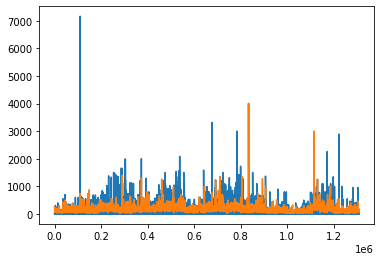

In [ ]:
cal_list['price_x'].plot();
cal_list['price_y'].plot();

In [ ]:
cal_list.columns

Index(['listing_id', 'date', 'available', 'price_x', 'id',
       'host_response_time', 'host_listings_count', 'street', 'neighbourhood',
       'city', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet', 'price_y',
       'monthly_price', 'extra_people', 'instant_bookable',
       'cancellation_policy', 'listing_description', 'listing_access',
       'host_rules'],
      dtype='object')

In [ ]:
cal_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308525 entries, 0 to 1308524
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   listing_id           1308525 non-null  object        
 1   date                 1308525 non-null  datetime64[ns]
 2   available            1308525 non-null  int64         
 3   price_x              1308525 non-null  float64       
 4   id                   1308525 non-null  object        
 5   host_response_time   1308525 non-null  category      
 6   host_listings_count  1308525 non-null  int64         
 7   street               1308525 non-null  object        
 8   neighbourhood        1308525 non-null  object        
 9   city                 1307795 non-null  object        
 10  zipcode              1294655 non-null  object        
 11  property_type        1308525 non-null  category      
 12  room_type            1308525 non-null  category      
 1

## Data Modelling

### 1. Which column has the most impact on the price?

In [ ]:
price_corr = listings_cleaned.corr()['price'].sort_values(ascending = False).head(15)[1:]
price_corr

accommodates               0.437756241
room_type_int              0.420485570
bedrooms                   0.382418260
beds                       0.371407364
bathrooms                  0.248695284
host_listings_count        0.171929964
cancellation_policy_int    0.156700886
bed_type_int               0.098714689
square_feet                0.048228026
extra_people               0.028703300
host_response_time_int    -0.019557594
instant_bookable          -0.057358557
Name: price, dtype: float64

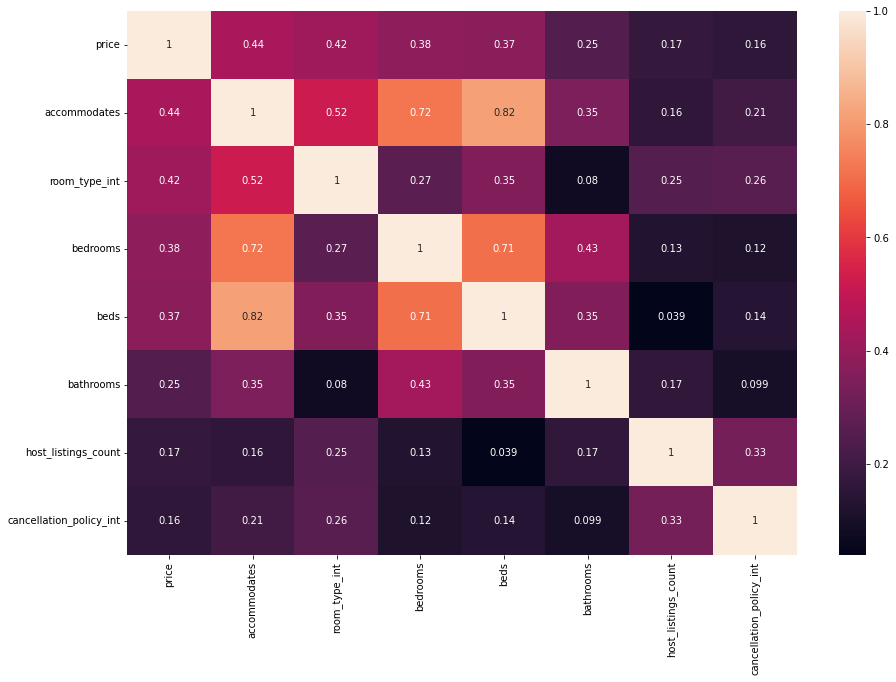

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(listings_cleaned[['price', 'accommodates', 'room_type_int', 'bedrooms', 'beds', 'bathrooms', 'host_listings_count', 'cancellation_policy_int']].corr(), annot=True);

#### Result & Explanation
From the heatmap it is understood that the;
- No. of people a listing's can **accomodates** has the highest affect on the price column.
- Room type available is the second biggest influencer.
- A scaling system was created in such a way that higher area apts. get higest value.
- No. of bedrooms and beds available also contributes to the pricing like in any traditional hotels.

### 2. Which neighbourhood in the listings are most expensive?

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors

In [202]:
len(exp_neighbourhood)

25

In [166]:
exp_neighbourhood = listings_cleaned.groupby(listings_cleaned['neighbourhood'])['price'].mean().sort_values(ascending = False)
xvalues = list(exp_neighbourhood.keys())
yvalues = list(exp_neighbourhood)
colorvalues = list(np.linspace(1, 0, 25))

clist = [(0, 'darkblue'), (1, 'darkred')]
colors = mcolors.LinearSegmentedColormap.from_list("", clist)

barcolors = []
for value in colorvalues:
    barcolors.append(colors(value))

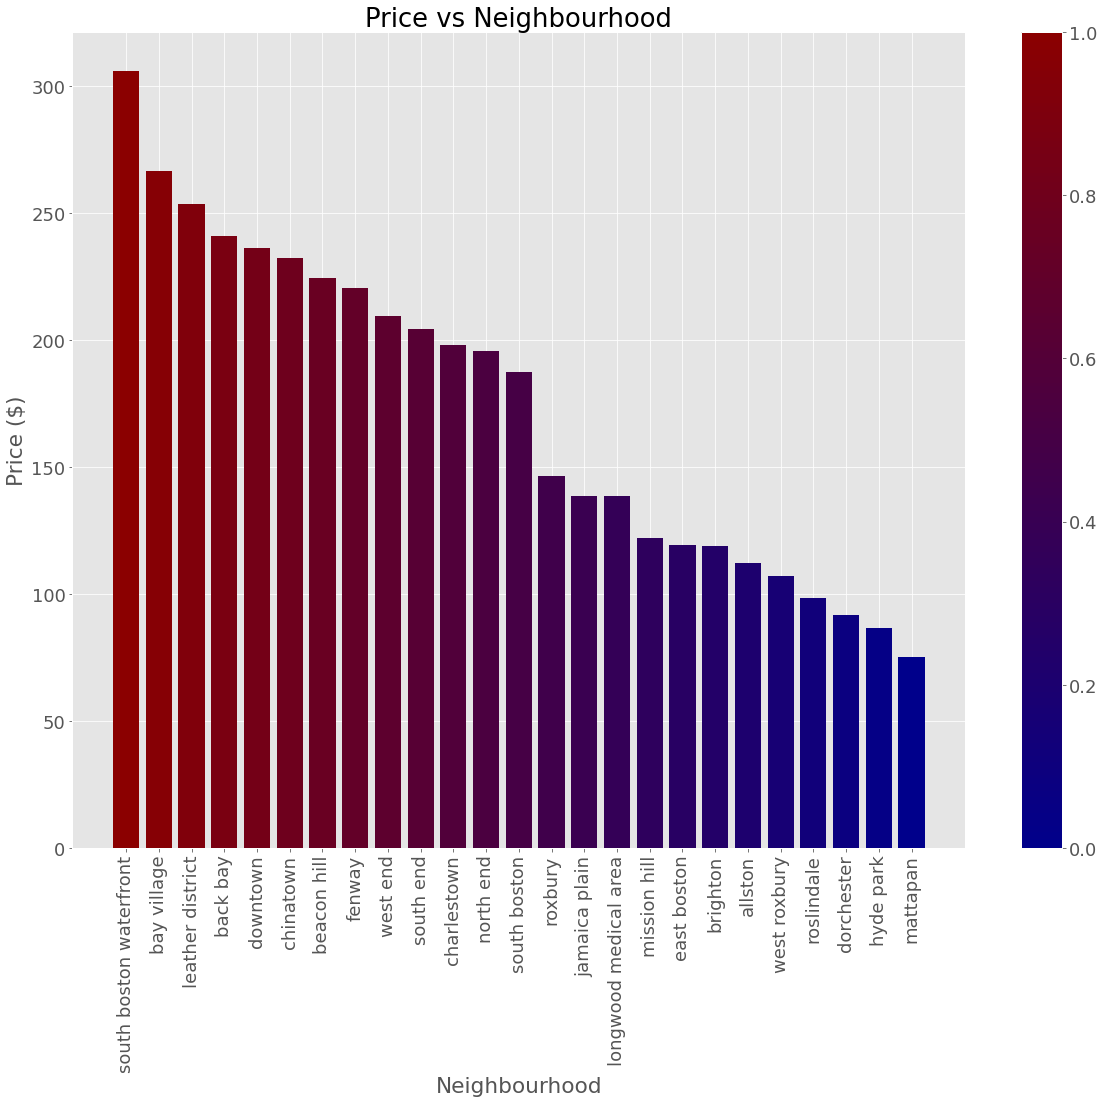

In [205]:
fig, ax = plt.subplots(figsize = (20,15))

cmappable = ScalarMappable(norm=plt.Normalize(0,1), cmap=colors)
plt.colorbar(cmappable)
plt.xticks(fontsize=18, rotation=90)

ax.set_ylabel("Price ($)")
ax.set_xlabel("Neighbourhood")
ax.set_title("Price vs Neighbourhood")
ax.bar(xvalues, yvalues, color = barcolors)
plt.show()

In [200]:
"Highest amount is ${} and lowest amount is ${}".format(
    np.round(exp_neighbourhood.max(), 2),
    np.round(exp_neighbourhood.min(), 2)
)

'Highest amount is $306.06 and lowest amount is $75.12'

#### Result & Explanation
From the barplot of all the neighbourhoods, it is evident that **South Boston** is the most expensive neighbourhood in the listings with the price of **$306.06**.

On the other hand **Mattapan** is the least expensive neighbourhood with the price of **$75.12**.

### 3a. What are the least busy times of the year to visit Boston?

In [186]:
calendar_cleaned['month'] = pd.DatetimeIndex(calendar_cleaned['date']).month

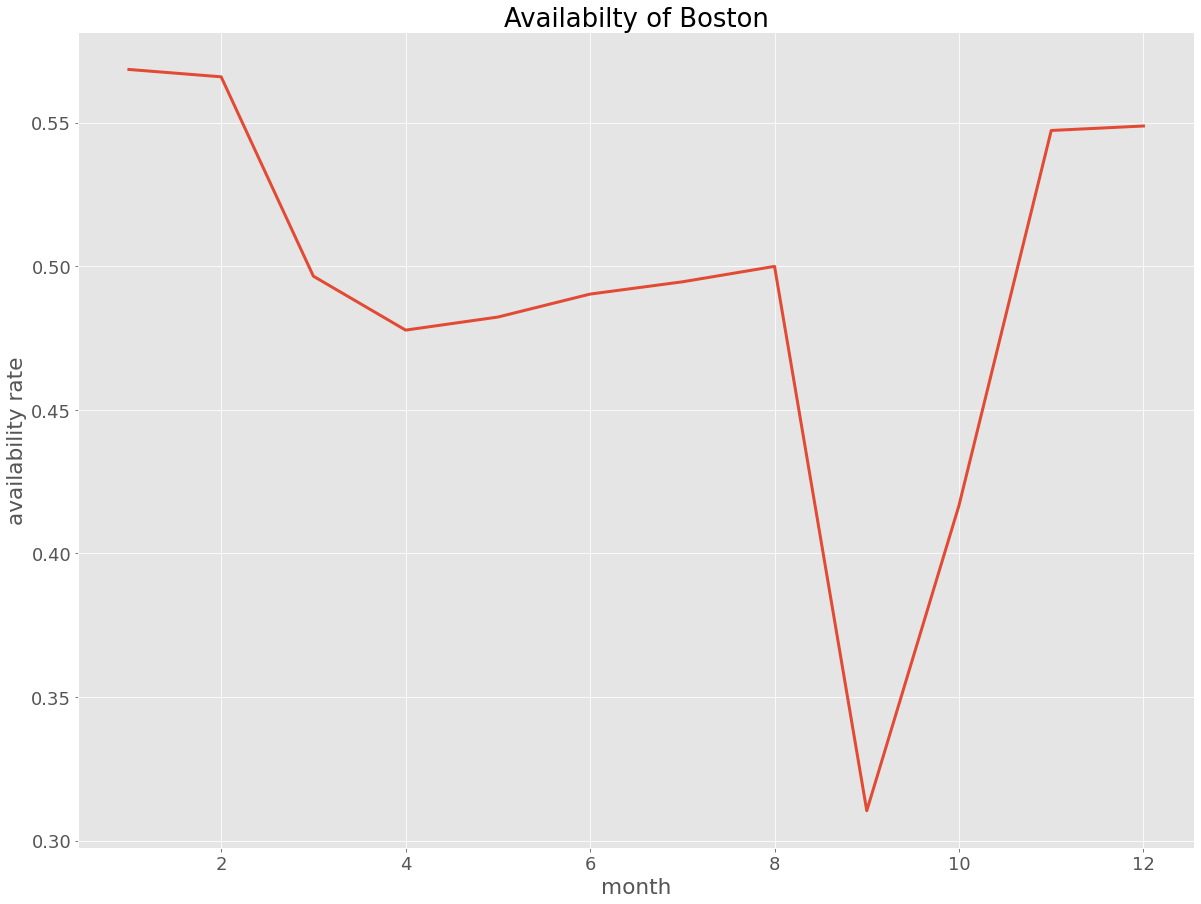

In [187]:
aob = calendar_cleaned.groupby('month')['available'].mean().plot(
    kind="line",
    title='Availabilty of Boston',
    figsize=(20,15),
    linewidth=3
)
aob.set_ylabel("availability rate")


plt.show()

### 3b. By how low do the prices get?

In [189]:
from matplotlib.pyplot import figure

In [188]:
calendar_cleaned_available = calendar_cleaned[calendar_cleaned["available"] == 1]

In [190]:
calendar_cleaned_available.groupby('month')['price'].mean()

month
1    182.799670787
2    180.961027988
3    181.818741958
4    197.252890117
5    193.712294776
6    196.535301815
7    202.486308971
8    203.330141646
9    237.055387473
10   233.425227793
11   202.915712393
12   192.600118046
Name: price, dtype: float64

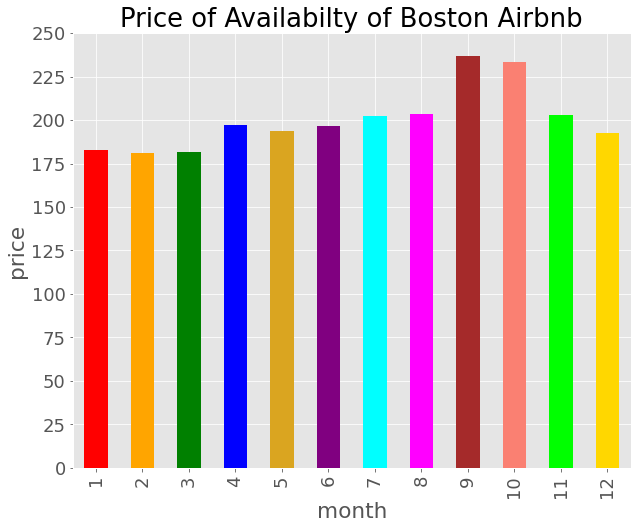

In [192]:
paob = calendar_cleaned_available.groupby('month')['price'].mean().plot(
    kind="bar",
    figsize=(10,8),
    color = ['red', 'orange', 'green', 'blue', 'goldenrod', 'purple', 'cyan', 'magenta', 'brown', 'salmon', 'lime', 'gold'],
    title='Price of Availabilty of Boston Airbnb',
)

plt.yticks(np.arange(0, 250+1, 25))
paob.set_ylabel("price")
plt.show()

#### Result & Explanation
From the above two plots it is indicated that **January** and **February** have the highest availability rate which suggests that the listings are available the most in these months indicating that these are the least busy times of the year to visit Boston.
Similarly the prices for the same months is as low as **$185**. 
